In [0]:
# Import libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import random
nltk.download('sentence_polarity')
from nltk.corpus import sentence_polarity
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package sentence_polarity is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Read in the train.tsv file
rawdata=pd.read_csv('/content/train.tsv', sep='\t')

In [0]:
rawdata.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
rawdata.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

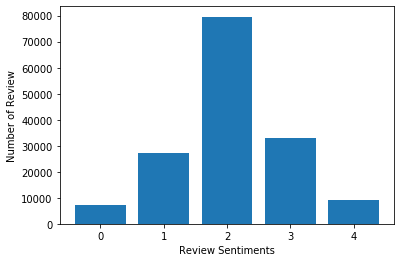

In [0]:
Sentiment_count=rawdata.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [0]:
!python classifyKaggle.py /content/ 100

Read 156060 phrases, using 100 random phrases
['a domestic unit', '2']
['whether we believe in them or not', '2']
['the races and rackets change', '2']
['Dismally dull', '2']
['of good kids and bad seeds', '2']
['ethnography and', '2']
['equal parts', '2']
['An uneven look', '2']
['slick', '3']
['the right', '2']
(['a', 'domestic', 'unit'], 2)
(['whether', 'we', 'believe', 'in', 'them', 'or', 'not'], 2)
(['the', 'races', 'and', 'rackets', 'change'], 2)
(['Dismally', 'dull'], 2)
(['of', 'good', 'kids', 'and', 'bad', 'seeds'], 2)
(['ethnography', 'and'], 2)
(['equal', 'parts'], 2)
(['An', 'uneven', 'look'], 2)
(['slick'], 3)
(['the', 'right'], 2)


In [0]:
df_stat = rawdata.copy()
df_stat['word_count'] = rawdata['Phrase'].apply(lambda txt: len(txt.split(' ')))
df_stat.head()

,PhraseId,SentenceId,Phrase,Sentiment,word_count
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


Minimum word count required to include all words in 95.0% of the reviews: 22.0


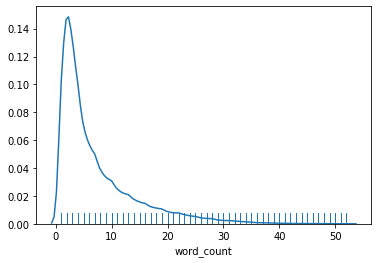

In [0]:
#Source: https://github.com/Peltarion/community-code/blob/master/movie_review_sentiment/movie_review_preprocessing.ipynb
q=0.95
x = df_stat['word_count']
sns.distplot(x, hist=False, rug=True);
print('Minimum word count required to include all words in {}% of the reviews: {}'.format(q*100, x.quantile(q)))